In [1]:
import pennylane as qml 
import pennylane.numpy as pnp 
import numpy as np 
import os 
import json 
from pprint import pprint
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'onecolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-white', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False) 
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    
    return {
            'fontsizes' : fontsizes,
            'colors' : {
                'quantumviolet' : _quantumviolet,
                'quantumgray' : _quantumgray
            }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#         defaults to 1.0
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#         defaults to False
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
print('Setup methods loaded')
cwd = os.getcwd() 
print(cwd)

res_file = '20211009-231603.json'
with open(os.path.join(cwd, res_file)) as f:
    res_dict = json.load(f)

print(res_dict.keys())

props = global_setup(columns = 'onecolumn', paper = 'a4paper', fontsize = 11)

print('Global props:')
for key in props:
    print(key, ':')
    for subkey in props[key]:
        print('    ', subkey, ': ', props[key][subkey])
cwd = os.getcwd() 
print(cwd)

Setup methods loaded
/home/peiyongw/Desktop/Research/QAS-Qiskit
dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])
Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  9
     small :  10
     normalsize :  11
     large :  12
     Large :  14
     LARGE :  17
     huge :  20
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555
/home/peiyongw/Desktop/Research/QAS-Qiskit


In [2]:
res_1_file = '20211012-020301.json'
res_2_file = '20211012-131536.json'
with open(os.path.join(cwd, res_1_file)) as f:
    res_dict_1 = json.load(f)

with open(os.path.join(cwd, res_2_file)) as f:
    res_dict_2 = json.load(f)

print(res_dict_1.keys())
print(res_dict_2.keys())

dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])
dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])


In [3]:
op_list_1 = res_dict_1['op_list']
print(op_list_1)
op_list_2 = res_dict_2['op_list']
print(op_list_2)

[['Hadamard', [3], None], ['CNOT', [0, 3], None], ['CNOT', [3, 0], None], ['CNOT', [1, 2], None], ['CNOT', [3, 1], None], ['CNOT', [0, 2], None]]
[['CNOT', [0, 1], None], ['Hadamard', [3], None], ['CNOT', [3, 1], None], ['CNOT', [1, 2], None], ['CNOT', [0, 1], None], ['CNOT', [3, 0], None]]


Circuit 1:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Circuit 2:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Target Circuit:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]



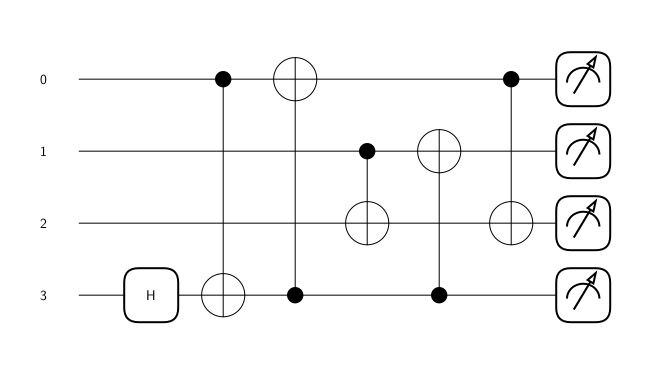

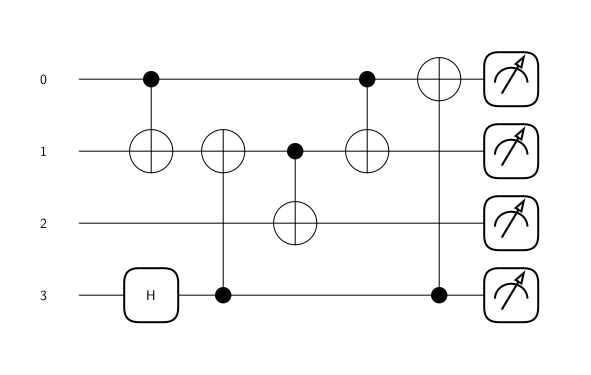

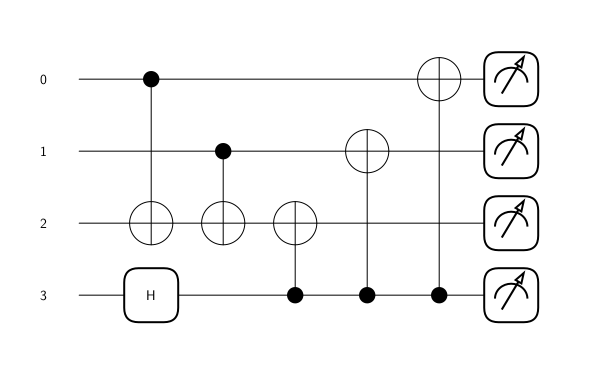

In [4]:
dev = qml.device('default.qubit', wires =4)
qml.drawer.use_style('black_white')
@qml.qnode(dev)
def circ_stem_1(x):
    qml.QubitStateVector(x, wires =[0,1])
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[3,0])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[3,1])
    qml.CNOT(wires=[0,2])
    return qml.state()
@qml.qnode(dev)
def circ_stem_1_mpl():
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[3,0])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[3,1])
    qml.CNOT(wires=[0,2])
    return qml.state()
print("Circuit 1:")
fig, ax = qml.draw_mpl(circ_stem_1_mpl)()
print(circ_stem_1(np.array([1,0,0,0])))
print()
@qml.qnode(dev)
def circ_stem_2(x):
    qml.QubitStateVector(x, wires =[0,1])
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[3,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[3,0])
    return qml.state()

@qml.qnode(dev)
def circ_stem_2_mpl():
    #qml.QubitStateVector(x, wires =[0,1])
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[3,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[3,0])
    return qml.state()

print("Circuit 2:")
fig, ax=qml.draw_mpl(circ_stem_2_mpl)()
print(circ_stem_2(np.array([1,0,0,0])))
print()
@qml.qnode(dev)
def target_circ(x):
    qml.QubitStateVector(x, wires =[0,1])
    qml.Hadamard(wires=[3])
    qml.CNOT(wires=[0,2])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[3,2])
    qml.CNOT(wires=[3,1])
    qml.CNOT(wires=[3,0])
    return qml.state()

@qml.qnode(dev)
def target_circ_mpl():
    #qml.QubitStateVector(x, wires =[0,1])
    qml.Hadamard(wires=[3])
    qml.CNOT(wires=[0,2])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[3,2])
    qml.CNOT(wires=[3,1])
    qml.CNOT(wires=[3,0])
    return qml.state()
print("Target Circuit:")
fig,ax=qml.draw_mpl(target_circ_mpl)()
print(target_circ(np.array([1,0,0,0])))
print()

In [5]:
ket0 = np.array([1,0])
ket1 = np.array([0,1])
for a in [ket0,ket1]:
    for b in [ket0,ket1]:
        print("Input state:")
        print(a,b)
        input_state = np.kron(a,b)
        print("circuit 1 output:")
        print(circ_stem_1(input_state))
        print("circuit 2 output:")
        print(circ_stem_2(input_state))
        print("target circuit output:")
        print(target_circ(input_state))
        print()

Input state:
[1 0] [1 0]
circuit 1 output:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
circuit 2 output:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
target circuit output:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Input state:
[1 0] [0 1]
circuit 1 output:
[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j
 0.        +0.j

In [6]:
reward_list_1 = res_dict_1['search_reward_list']
reward_list_1

[[0, [2, 3, 8, 14, 13, 8], 0.4999999999999998, 0.4999999999999998],
 [1, [6, 2, 10, 8, 4, 6], 0.4723013663870683, 0.4723013663870683],
 [2, [6, 7, 13, 2, 14, 10], 0.38979334151332456, 0.38979334151332456],
 [3, [3, 6, 13, 8, 14, 5], 0.9999999999999997, 0.9999999999999997]]

In [7]:
reward_list_2 = res_dict_2['search_reward_list']
reward_list_2

[[0, [2, 3, 14, 15, 13, 5], 0.4999999999999998, 0.4999999999999998],
 [1, [3, 2, 14, 13, 8, 5], 0.4999999999999998, 0.4999999999999998],
 [2, [3, 2, 9, 15, 13, 14], 0.4999999999999998, 0.4999999999999998],
 [3, [3, 2, 9, 4, 13, 4], 0.4999999999999998, 0.4999999999999998],
 [4, [3, 2, 13, 11, 5, 8], 0.4999999999999998, 0.4999999999999998],
 [5, [3, 7, 9, 2, 14, 7], 0.4999999999999998, 0.4999999999999998],
 [6, [2, 4, 3, 13, 4, 15], 0.4999999999999998, 0.4999999999999998],
 [7, [4, 3, 14, 8, 4, 13], 0.9999999999999997, 0.9999999999999997]]

In [8]:
reward_list_1 = [c[2] for c in reward_list_1]
reward_list_2 = [c[2] for c in reward_list_2]

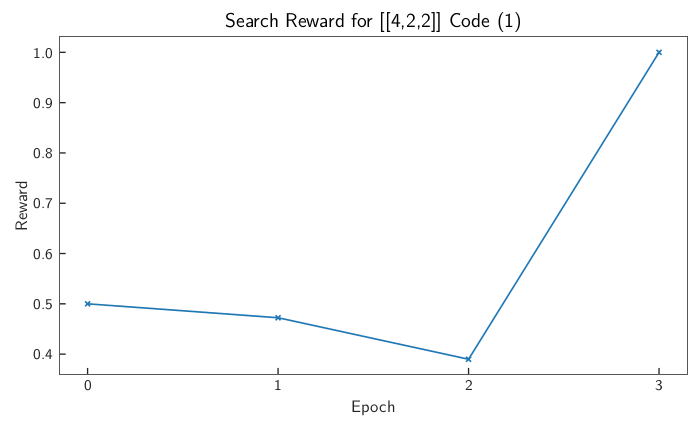

In [9]:
fig = plot_setup()
plt.plot(list(range(len(reward_list_1))), reward_list_1,linestyle = '-',marker = 'x')
plt.xticks(list(range(len(reward_list_1))))
plt.title("Search Reward for [[4,2,2]] Code (1)")
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.tight_layout()

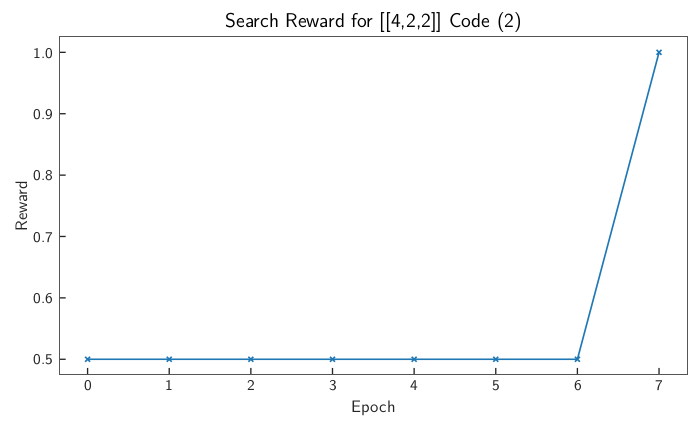

In [10]:
fig = plot_setup()
plt.plot(list(range(len(reward_list_2))), reward_list_2,linestyle = '-',marker = 'x')
plt.title("Search Reward for [[4,2,2]] Code (2)")
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.tight_layout()